In [29]:
%cd /content/drive/MyDrive/colab/DeeLearning_빅데16차

/content/drive/MyDrive/colab/DeeLearning_빅데16차


#### 목표
- 폐암 환자의 생존을 예측하는 분류 모델을 만들어보자(0 : 사망 , 1 : 생존)
- 다층 퍼셉트론(신경망)을 활용하여 이진분류문제를 해결해보자. 


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [31]:
# 데이터 불러오기
# header : 데이터 불러오면서 컬럼명 설정해주는 키워드
# None : 인덱스 번호로 컬럼명 출력하기
data = pd.read_csv('./data/ThoraricSurgery.csv',header = None)
data.head()

# 앞 17개 0부터 16번까지는 : 특성데이터(종양 유형, 폐활량, 고통정도, 기침 등 환자상태 칼럼)
#  마지막 18번째(17칼럼) : 클래스 래이블(수술 후 생존결과 , 0 : 사망, 1: 생존)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,293,1,3.80,2.80,0,0,0,0,0,0,12,0,0,0,1,0,62,0
1,1,2,2.88,2.16,1,0,0,0,1,1,14,0,0,0,1,0,60,0
2,8,2,3.19,2.50,1,0,0,0,1,0,11,0,0,1,1,0,66,1
3,14,2,3.98,3.06,2,0,0,0,1,1,14,0,0,0,1,0,80,1
4,17,2,2.21,1.88,0,0,1,0,0,0,12,0,0,0,1,0,56,0


In [32]:
data.shape

(470, 18)

In [33]:
# 앞 17개 0부터 16번까지는 : 특성데이터(종양 유형, 폐활량, 고통정도, 기침 등 환자상태 칼럼)
#  마지막 18번째(17칼럼) : 클래스 래이블(수술 후 생존결과 , 0 : 사망, 1: 생존)
X = data.iloc[ : , : 17]
y = data.loc[ : , 17 ]

print(X.shape)
print(y.shape)

(470, 17)
(470,)


In [34]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,293,1,3.80,2.80,0,0,0,0,0,0,12,0,0,0,1,0,62
1,1,2,2.88,2.16,1,0,0,0,1,1,14,0,0,0,1,0,60
2,8,2,3.19,2.50,1,0,0,0,1,0,11,0,0,1,1,0,66
3,14,2,3.98,3.06,2,0,0,0,1,1,14,0,0,0,1,0,80
4,17,2,2.21,1.88,0,0,1,0,0,0,12,0,0,0,1,0,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,98,6,3.04,2.40,2,0,0,0,1,0,11,0,0,0,1,0,76
466,369,6,3.88,2.72,1,0,0,0,1,0,12,0,0,0,1,0,77
467,406,6,5.36,3.96,1,0,0,0,1,0,12,0,0,0,0,0,62
468,25,8,4.32,3.20,0,0,0,0,0,0,11,0,0,0,0,0,58


In [35]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state = 5)

# 크기 확인
print('훈련용',X_train.shape)
print('훈련용',y_train.shape)
print('테스트용',X_test.shape)
print('테스트용',y_test.shape)

훈련용 (329, 17)
훈련용 (329,)
테스트용 (141, 17)
테스트용 (141,)



### keras를 활용하여 딥러닝 신경망 구축 !
- 1. 신경망 구조 설계
- 2. 학습/ 평가 방법 설정
- 3. 학습 + 시각화
- 4. 평가 + 예측


In [36]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# Dense안에 있는 매개변수값으로 활성화 함수 연결

In [37]:
# 1. 신경망 구조 설계
model = Sequential() # 뼈대 구축

# 입력층(input_dim : 특성의 개수 입력 = 17개) + 중간층 1
# activation : 활성화 함수 설정 -> sigmoid(문자열로 표시)
model.add(Dense(units=10 , input_dim = 17, activation = 'sigmoid'))

# 중간층
model.add(Dense(6, activation = 'sigmoid')) # 하나의 퍼셉트론 층!
model.add(Dense(4, activation = 'sigmoid'))  # 얘도 퍼셉트론 층
# 활성화 : 자극에 대한 반응여부를 결정한다.

# 출력층
# 이진분류(다중분류도 존재)(0,1 클래스 2개 중에 1를 예측하는 것)
# 회귀 (유닛 개수 : 1, 활성화 함수 : linear 선형함수(항등함수 => 생략 !))
# 이진분류( 유닛개수 : 1, 활성화 함수 :'sigmoid')
model.add(Dense(1,activation = 'sigmoid'))
# sigmoid를 통해서 마지막 결과가 0~1상이의 확률 정보로 출력
# 0.5 기준값 , 클래스가 1이라고 구별 , 작으면 클래스가 0이라고 구분

# 모델 정보 요약
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                180       
                                                                 
 dense_5 (Dense)             (None, 6)                 66        
                                                                 
 dense_6 (Dense)             (None, 4)                 28        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 279
Trainable params: 279
Non-trainable params: 0
_________________________________________________________________


In [38]:
# 2. 학습/ 평가방법 설정
# compile(손실함수, 최적화함수, 평가지표)
# 이진분류 손실함수 : binary_crossentropy
model.compile(loss ='binary_crossentropy', # 오차계산
               optimizer = 'sgd', #최적화함수 옵티마이저 : 경사하강법의 기초가 되는 친구
              metrics = ['accuracy'] ) # 분류 평가로 가장 많이 사용했던 정확도! 

In [39]:
# 3. 모델 학습
# 학습 반복 횟수 : epochs
h =  model.fit(X_train,y_train,epochs = 100)

Epoch 1/100
11/11 [==============================] - 1s 4ms/step - loss: 0.5548 - accuracy: 0.8541
Epoch 2/100
11/11 [==============================] - 0s 2ms/step - loss: 0.5381 - accuracy: 0.8541
Epoch 3/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5234 - accuracy: 0.8541
Epoch 4/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5112 - accuracy: 0.8541
Epoch 5/100
11/11 [==============================] - 0s 2ms/step - loss: 0.5000 - accuracy: 0.8541
Epoch 6/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4899 - accuracy: 0.8541
Epoch 7/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4817 - accuracy: 0.8541
Epoch 8/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4741 - accuracy: 0.8541
Epoch 9/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4679 - accuracy: 0.8541
Epoch 10/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4621 - accuracy: 0.8541
Epoch 11/

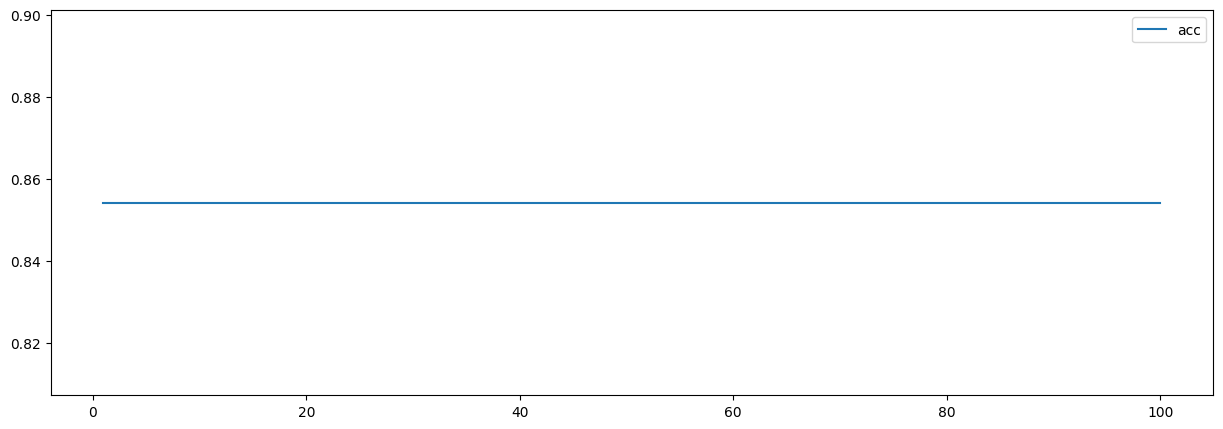

In [41]:
# 100 번을 돌렸기때문에 이를 시각화해서 변화하는것을 보게 해줄것임
# 학습이 반복될때마다 정확도 변화 그래프

plt.figure(figsize = (15, 5))
plt.plot(range(1,101),
         h.history['accuracy'],label = 'acc')
plt.legend() # 범례표시
plt.show()

# 초반에 예측했던 정확도와 계속 같았음(그냥 초반에 셋팅이 되었을때랑 다를게 없이 계속 같은것을 볼 수 있음)

In [42]:
# 4. 모델 평가
# evaluate()
model.evaluate(X_test,y_test)[1]  # 인덱스 1은 정확도만!

5/5 [==============================] - 0s 3ms/step - loss: 0.4339 - accuracy: 0.8440


[0.43390533328056335, 0.8439716100692749]

In [43]:
pre = model.predict(X_test)
pre

# 0~1 출력된 값을 해석
# 0.5를 기준으로 작으면 0, 아니면 1
#  여기서 모두 0.5 이하니까 => 예측을 다 0으로 된한거임

5/5 [==============================] - 0s 6ms/step


array([[0.14868563],
       [0.14559536],
       [0.145596  ],
       [0.14559536],
       [0.14559536],
       [0.14559536],
       [0.14559537],
       [0.14559537],
       [0.14559537],
       [0.15116684],
       [0.14891434],
       [0.14559542],
       [0.14559536],
       [0.15118389],
       [0.15087011],
       [0.1455954 ],
       [0.15034093],
       [0.15076257],
       [0.15087512],
       [0.1511611 ],
       [0.14559554],
       [0.14559539],
       [0.14559577],
       [0.14559536],
       [0.14559537],
       [0.1455957 ],
       [0.14559592],
       [0.14902785],
       [0.14559539],
       [0.14752732],
       [0.14559552],
       [0.14560334],
       [0.15039095],
       [0.15091975],
       [0.14560826],
       [0.14963403],
       [0.14559542],
       [0.15119116],
       [0.14559548],
       [0.14559542],
       [0.14559542],
       [0.14559537],
       [0.14559542],
       [0.15108405],
       [0.145596  ],
       [0.15117788],
       [0.14560013],
       [0.145

In [46]:
#  여기서 모두 0.5 이하니까 => 예측을 다 0으로 된한거임
# False 면 0.5보다 다 작은거임
pre2 = pre>0.5

from sklearn.metrics import confusion_matrix
# 혼동행렬표
cm = confusion_matrix(y_test, pre2)
display(cm)

# 데이터 프레임으로 변환(예쁘게 만들어주기)
cm_df = pd.DataFrame(cm,index = ['실제 0' , '실제1'],columns = ['예측0','예측1'])
cm_df  # 이게 혼동 행렬표!

# 표 해석 해보기! : 실제로는 22명은 살았는데 죽었다고 해서 정확도가 84% 출력된거임


# 층마다 다른 함수 사용이 가능하다.

array([[119,   0],
       [ 22,   0]])

,예측0,예측1
실제 0,119,0
실제1,22,0
